# Άσκηση 1

### Ερώτημα α

Λαμβάνουμε υπόψην μόνο την επίδραση της Γης.

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pylab as plt

Μας δίνονται τα εξής στοιχέια:

In [2]:
mu=3.986*10**5 #km^3/s^2
md=400*10**3 #kg
S=8000*10**(-6) #km^2
H=400 #km
Rearth=6371 #km
a=H+Rearth #km
N=6000

Το πρόβλημα των δυο σωμάτων χωρίς διαταραχές:

In [3]:
def rhs_2bd(t,X):
    x,y,vx,vy=X
    r=np.sqrt(x*x+y*y)
    x_dot=vx
    y_dot=vy
    vx_dot=-mu*x/r**3
    vy_dot=-mu*y/r**3
    return [x_dot,y_dot,vx_dot,vy_dot]

Η λύση του συστήματος:

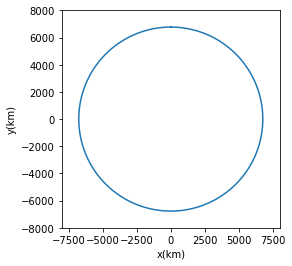

In [4]:
T=2*np.pi*np.sqrt(a**3/mu) #s
t0=0
tmax=N*T
IC=[0,a,-np.sqrt(mu/a),0] #αρχικές συνθήκες
sol=solve_ivp(rhs_2bd,[t0,tmax],IC,
  t_eval=np.linspace(0,tmax,N),method='DOP853',atol=1e-8,rtol=1e-12)
yy=sol.y
tt=sol.t

#Σχεδιασμός της τροχιάς για 6000*Τ
plt.figure()
plt.plot(yy[0],yy[1])
plt.xlabel("x(km)")
plt.ylabel("y(km)")
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-8000, 8000)
plt.ylim(-8000, 8000)
plt.show()

Το error στο ύψος:

In [5]:
def radius(x,y):
    return np.sqrt(x**2+y**2)

r1=radius(yy[1][0],yy[0][0]) #απόσταση τη χρονική στιγμή t=0
r2=radius(yy[1][len(yy[1])-1],yy[0][len(yy[0])-1]) #απόσταση τη χρονική στιγμή t=6000*T
er=r2-r1
print(er)

-1.8546770661487244e-06


Βλέπουμε ότι το ύψος μένει σταθερό της τάξης του $10^{-6}$ κάτι που άλλωστε φαίνεται και από την τροχιά του που μένει σταθερή 